# 🎨 Paint: Herbie's Custom Colormaps

> ## This notebook is used to create the figures used in `paint.md`

> ### 🚧 Work in progress

Herbie comes with it's own paint, or custom colormaps for various types of maps. I don't promise they are all "color blind friendly" aor perceptively uniform, but they look nice to me.

This includes:

- National Weather Service custom color curves.
- Brian's custom terrain cmaps.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from herbie import Herbie, paint
from herbie.toolbox import EasyMap, pc

## NWS Standard Color Curves
Colormaps are registered with matplotlib.

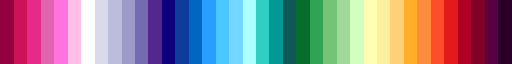

In [2]:
plt.get_cmap("nws.tmp2")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-01 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


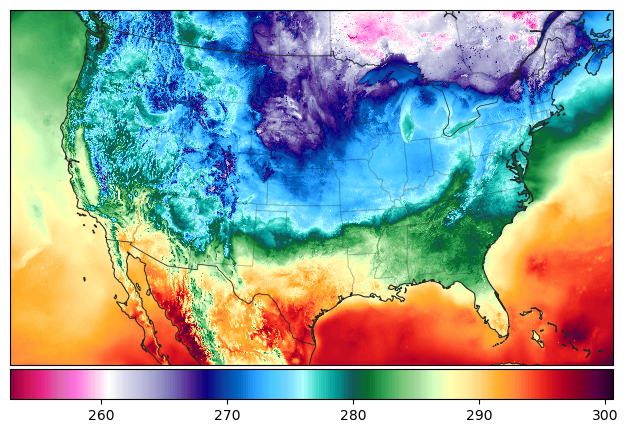

In [3]:
H = Herbie("2024-01-01")
ds = H.xarray("TMP:2 m")

ax = EasyMap("50m", crs=ds.herbie.crs).BORDERS().STATES().ax
art = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, cmap="nws.tmp", transform=pc)

plt.colorbar(art, ax=ax, orientation="horizontal", pad=0.01)

plt.tight_layout()
plt.savefig("../../_static/paint/herbie_paint_nwsTmp")

## Terrain Colormaps

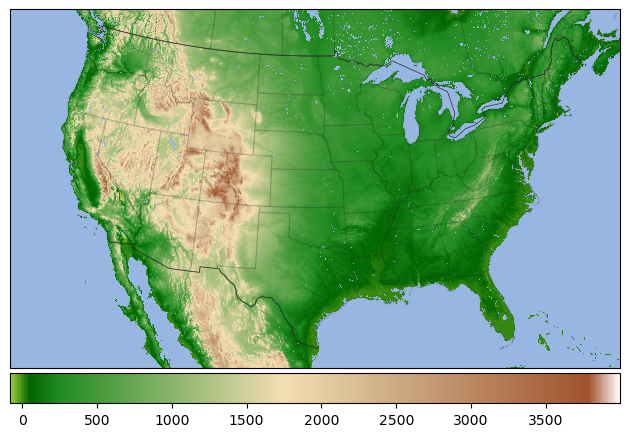

In [4]:
t = H.terrain()
ax = EasyMap("50m", crs=ds.herbie.crs, add_coastlines=False).BORDERS().STATES().ax

art = ax.pcolormesh(t.longitude, t.latitude, t.orog, cmap="land.green", transform=pc)

plt.colorbar(art, ax=ax, orientation="horizontal", pad=0.01)

plt.tight_layout()
plt.savefig(f"../../_static/paint/herbie_paint_landGreen")

## Using intended bounds
The NWS paint classes come with intended bounds, in specefic units.
- Temperature = Celsius
- Precipitation = mm
- dew point == Celsius
- etc.

In [5]:
from herbie import Herbie
from herbie import paint
import matplotlib.pyplot as plt
import numpy as np
from herbie.toolbox import EasyMap, pc

# 2-m temp, dew point, humidity
H = Herbie("2024-01-01", fxx=18)
ds = H.xarray("(?:TMP|DPT|RH):2 m")

# 10-m wind
dsw = H.xarray("[U|V]GRD:10 m")
dsw["wspd"] = np.sqrt(dsw.u10**2 + dsw.v10**2)

# Precip
dsp = H.xarray("PCP:surface:0-")

# Cloud cover
dsc = H.xarray(":TCDC:entire atmosphere:")

# 500 mb wind
ds2 = H.xarray("GRD:500 mb")
ds2["wspd"] = np.sqrt(ds2.u**2 + ds2.v**2)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-Jan-01 00:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws


/home/blaylock/miniconda3/envs/herbie-dev/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1781: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


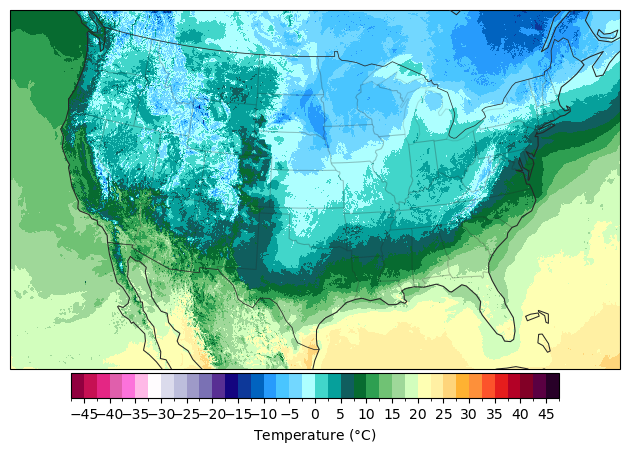

In [6]:
ax = EasyMap(crs=ds.herbie.crs).BORDERS().STATES().ax

plt.pcolormesh(
    ds.longitude,
    ds.latitude,
    (ds.t2m - 273.15),
    **paint.NWSTemperature.kwargs2,
    transform=pc,
)

plt.colorbar(
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
    **paint.NWSTemperature.cbar_kwargs2,
)

plt.tight_layout()
plt.savefig(f"../../_static/paint/herbie_paint_NWSTemperature")

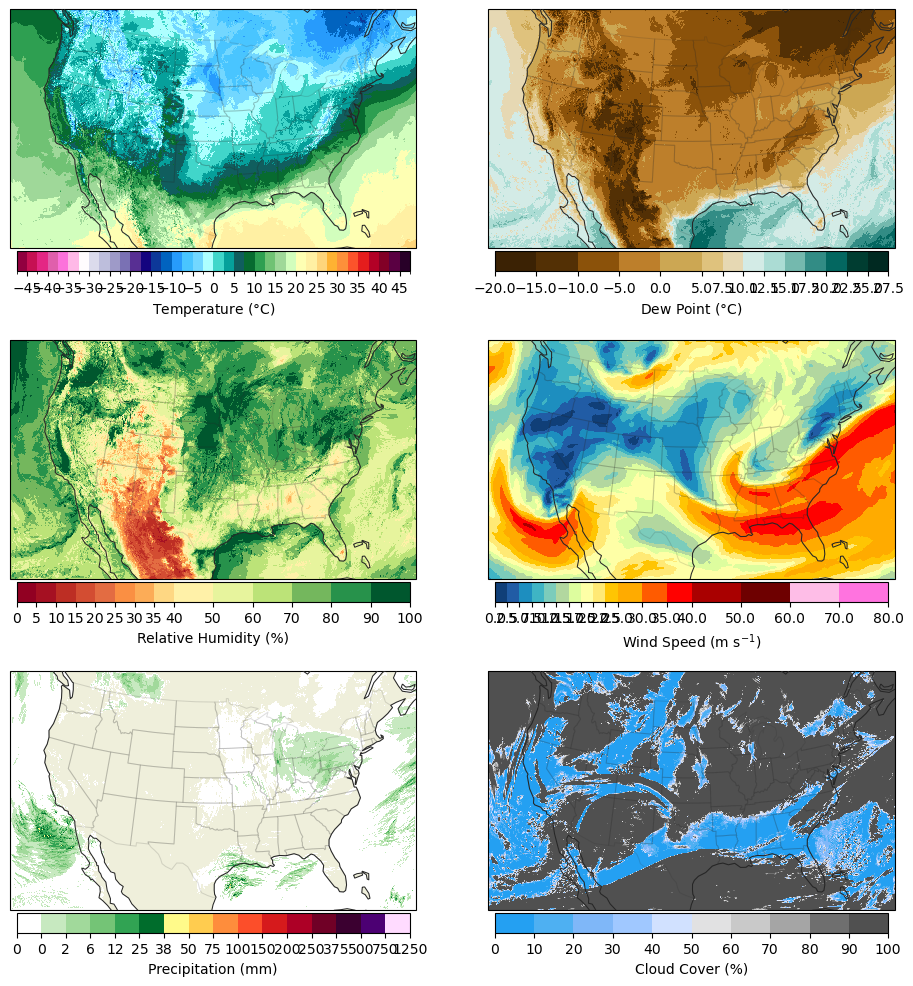

In [7]:
fig, [(ax1, ax2), (ax3, ax4), (ax5, ax6)] = plt.subplots(
    3, 2, figsize=[10, 10], subplot_kw=dict(projection=ds.herbie.crs)
)
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    EasyMap(ax=ax).LAND().STATES()

art1 = ax1.pcolormesh(
    ds.longitude,
    ds.latitude,
    (ds.t2m - 273.15),
    **paint.NWSTemperature.kwargs2,
    transform=pc,
)
art2 = ax2.pcolormesh(
    ds.longitude,
    ds.latitude,
    (ds.d2m - 273.15),
    **paint.NWSDewPointTemperature.kwargs2,
    transform=pc,
)
art3 = ax3.pcolormesh(
    ds.longitude, ds.latitude, ds.r2, **paint.NWSRelativeHumidity.kwargs2, transform=pc
)
art4 = ax4.pcolormesh(
    ds.longitude, ds.latitude, ds2.wspd, **paint.NWSWindSpeed.kwargs2, transform=pc
)
art5 = ax5.pcolormesh(
    dsp.longitude,
    dsp.latitude,
    dsp.tp.where(dsp.tp > 0),
    **paint.NWSPrecipitation.kwargs2,
    transform=pc,
)
art6 = ax6.pcolormesh(
    ds.longitude,
    ds.latitude,
    dsc.tcc,
    transform=pc,
    **paint.NWSCloudCover.kwargs2,
)

common_kws = dict(
    orientation="horizontal",
    pad=0.01,
    shrink=0.8,
)
plt.colorbar(
    art1,
    ax=ax1,
    **common_kws,
    **paint.NWSTemperature.cbar_kwargs2,
)
plt.colorbar(
    art2,
    ax=ax2,
    **common_kws,
    **paint.NWSDewPointTemperature.cbar_kwargs2,
)
plt.colorbar(
    art3,
    ax=ax3,
    **common_kws,
    **paint.NWSRelativeHumidity.cbar_kwargs2,
)
plt.colorbar(
    art4,
    ax=ax4,
    **common_kws,
    **paint.NWSWindSpeed.cbar_kwargs2,
)
plt.colorbar(
    art5,
    ax=ax5,
    **common_kws,
    **paint.NWSPrecipitation.cbar_kwargs2,
)
plt.colorbar(
    art6,
    ax=ax6,
    **common_kws,
    **paint.NWSCloudCover.cbar_kwargs2,
)

plt.tight_layout()

plt.savefig(f"../../_static/paint/herbie_paint_nws")

## Swaths and Lightness

Copied code from
https://matplotlib.org/stable/users/explain/colors/colormaps.html

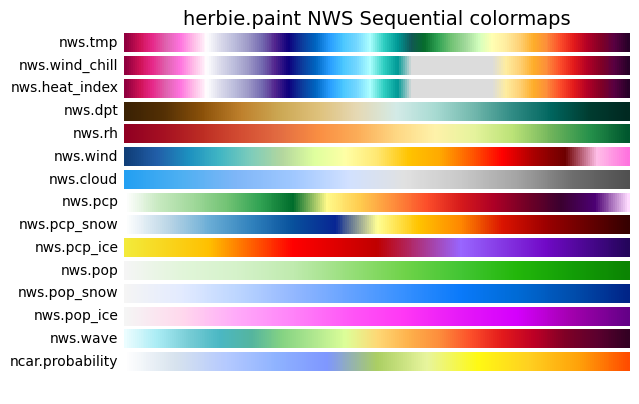

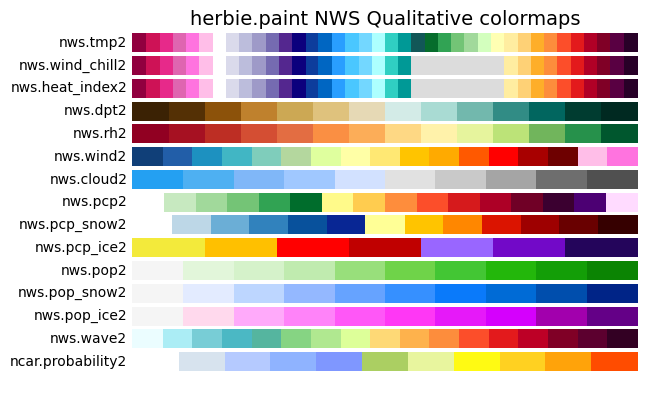

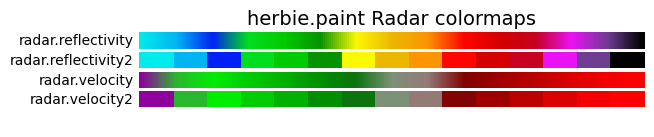

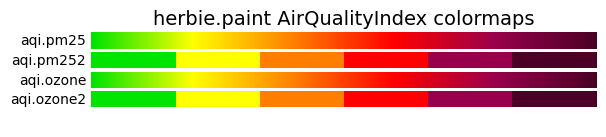

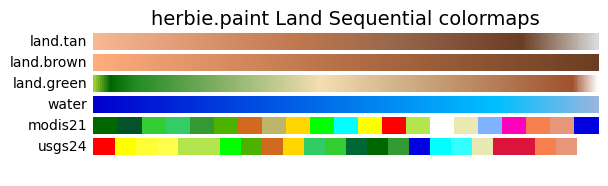

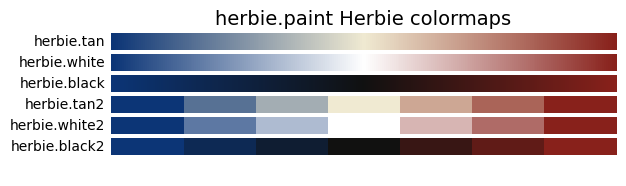

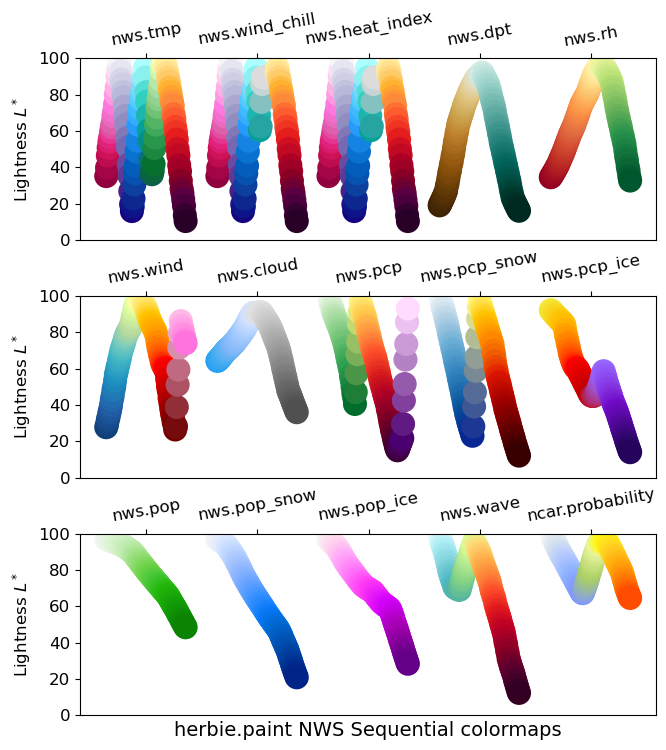

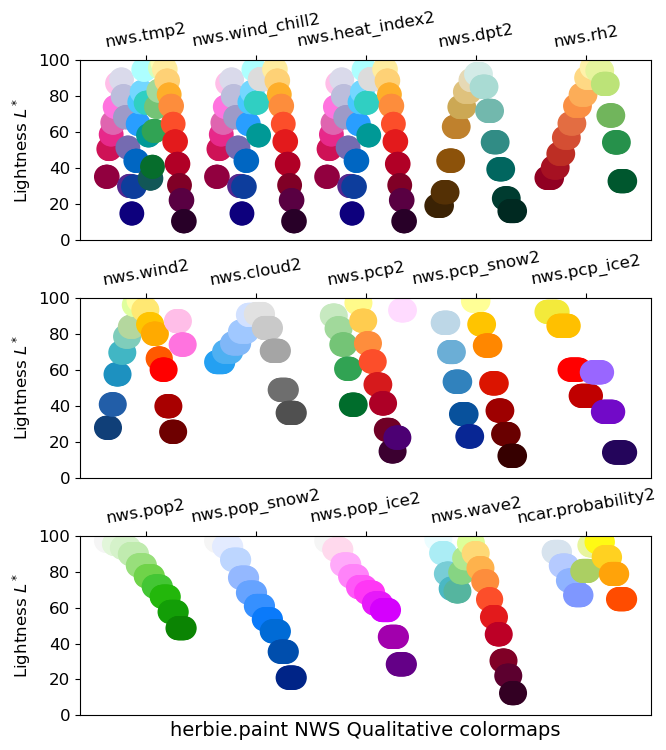

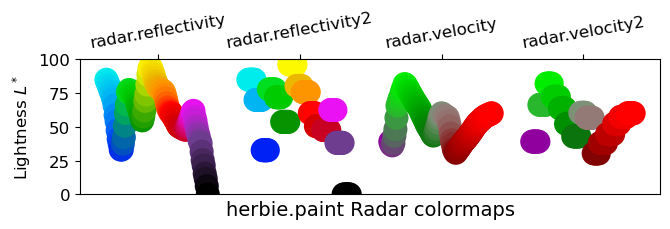

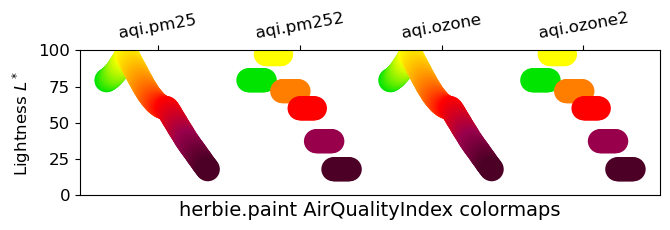

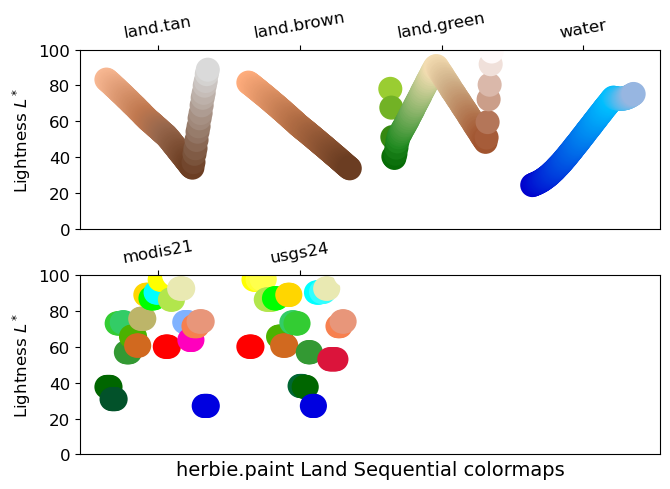

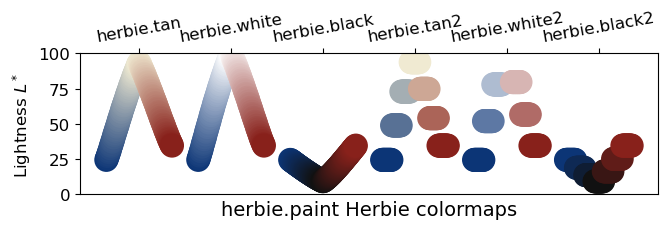

In [8]:
from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
import herbie.paint  # noqa: E402


# --------------

cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh, left=0.2, right=0.99)
    axs[0].set_title(f"{category} colormaps", fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect="auto", cmap=mpl.colormaps[name])
        ax.text(
            -0.01,
            0.5,
            name,
            va="center",
            ha="right",
            fontsize=10,
            transform=ax.transAxes,
        )

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

    # Save Figure
    plt.savefig(
        f"../../_static/paint/{category.replace('herbie.paint', '').strip().replace(' ', '_')}"
    )


# --------------

plot_color_gradients(
    "herbie.paint NWS Sequential",
    [
        "nws.tmp",
        "nws.wind_chill",
        "nws.heat_index",
        "nws.dpt",
        "nws.rh",
        "nws.wind",
        "nws.cloud",
        "nws.pcp",
        "nws.pcp_snow",
        "nws.pcp_ice",
        "nws.pop",
        "nws.pop_snow",
        "nws.pop_ice",
        "nws.wave",
        "ncar.probability",
    ],
)

plot_color_gradients(
    "herbie.paint NWS Qualitative",
    [
        "nws.tmp2",
        "nws.wind_chill2",
        "nws.heat_index2",
        "nws.dpt2",
        "nws.rh2",
        "nws.wind2",
        "nws.cloud2",
        "nws.pcp2",
        "nws.pcp_snow2",
        "nws.pcp_ice2",
        "nws.pop2",
        "nws.pop_snow2",
        "nws.pop_ice2",
        "nws.wave2",
        "ncar.probability2",
    ],
)

plot_color_gradients(
    "herbie.paint Radar",
    [
        "radar.reflectivity",
        "radar.reflectivity2",
        "radar.velocity",
        "radar.velocity2",
    ],
)

plot_color_gradients(
    "herbie.paint AirQualityIndex",
    [
        "aqi.pm25",
        "aqi.pm252",
        "aqi.ozone",
        "aqi.ozone2",
    ],
)

plot_color_gradients(
    "herbie.paint Land Sequential",
    [
        "land.tan",
        "land.brown",
        "land.green",
        "water",
        "modis21",
        "usgs24",
    ],
)

plot_color_gradients(
    "herbie.paint Herbie",
    [
        "herbie.tan",
        "herbie.white",
        "herbie.black",
        "herbie.tan2",
        "herbie.white2",
        "herbie.black2",
    ],
)

# --------------

mpl.rcParams.update({"font.size": 12})

# Number of colormap per subplot for particular cmap categories
_DSUBS = {
    "herbie.paint NWS Sequential": 5,
    "herbie.paint NWS Qualitative": 5,
    "herbie.paint Radar": 5,
    "herbie.paint AirQualityIndex": 5,
    "herbie.paint Land Sequential": 4,
    "herbie.paint Herbie": 6,
}

# Spacing between the colormaps of a subplot
_DC = {
    "herbie.paint NWS Sequential": 1.4,
    "herbie.paint NWS Qualitative": 1.4,
    "herbie.paint Radar": 1.4,
    "herbie.paint AirQualityIndex": 1.4,
    "herbie.paint Land Sequential": 1.4,
    "herbie.paint Herbie": 1.4,
}

# Indices to step through colormap
x = np.linspace(0.0, 1.0, 100)

# Do plot
for cmap_category, cmap_list in cmaps.items():
    # Do subplots so that colormaps have enough space.
    # Default is 6 colormaps per subplot.
    dsub = _DSUBS.get(cmap_category, 6)
    nsubplots = int(np.ceil(len(cmap_list) / dsub))

    # squeeze=False to handle similarly the case of a single subplot
    fig, axs = plt.subplots(
        nrows=nsubplots, squeeze=False, figsize=(7, 2.6 * nsubplots)
    )

    for i, ax in enumerate(axs.flat):
        locs = []  # locations for text labels

        for j, cmap in enumerate(cmap_list[i * dsub : (i + 1) * dsub]):
            # Get RGB values for colormap and convert the colormap in
            # CAM02-UCS colorspace.  lab[0, :, 0] is the lightness.
            rgb = mpl.colormaps[cmap](x)[np.newaxis, :, :3]
            lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)

            # Plot colormap L values.  Do separately for each category
            # so each plot can be pretty.  To make scatter markers change
            # color along plot:
            # https://stackoverflow.com/q/8202605/

            if cmap_category == "Sequential":
                # These colormaps all start at high lightness, but we want them
                # reversed to look nice in the plot, so reverse the order.
                y_ = lab[0, ::-1, 0]
                c_ = x[::-1]
            else:
                y_ = lab[0, :, 0]
                c_ = x

            dc = _DC.get(cmap_category, 1.4)  # cmaps horizontal spacing
            ax.scatter(x + j * dc, y_, c=c_, cmap=cmap, s=300, linewidths=0.0)

            # Store locations for colormap labels
            if cmap_category in ("Perceptually Uniform Sequential", "Sequential"):
                locs.append(x[-1] + j * dc)
            else:
                locs.append(x[int(x.size / 2.0)] + j * dc)

        # Set up the axis limits:
        #   * the 1st subplot is used as a reference for the x-axis limits
        #   * lightness values goes from 0 to 100 (y-axis limits)
        ax.set_xlim(axs[0, 0].get_xlim())
        ax.set_ylim(0.0, 100.0)

        # Set up labels for colormaps
        ax.xaxis.set_ticks_position("top")
        ticker = mpl.ticker.FixedLocator(locs)
        ax.xaxis.set_major_locator(ticker)
        formatter = mpl.ticker.FixedFormatter(cmap_list[i * dsub : (i + 1) * dsub])
        ax.xaxis.set_major_formatter(formatter)
        ax.xaxis.set_tick_params(rotation=10)
        ax.set_ylabel("Lightness $L^*$", fontsize=12)

    ax.set_xlabel(cmap_category + " colormaps", fontsize=14)

    fig.tight_layout(h_pad=0.0, pad=1.5)
    plt.savefig(
        f"../../_static/paint/{cmap_category.replace('herbie.paint', '').strip().replace(' ', '_')}_lightness"
    )